#X : City name, Journey starting time, Journey starting date, Journey duration in hours
#y : Journey price quote

In [2]:
import pandas as pd
import numpy as np
import datetime

In [3]:
dfJourneys = pd.read_csv('data/journeys.csv')
#dfJourneys

In [4]:
dfJourneys['Trip Start At Local Time'] = pd.to_datetime(dfJourneys['Trip Start At Local Time'], format="%Y/%m/%d %H:%M:%S")
dfJourneys['Trip End At Local Time'] = pd.to_datetime(dfJourneys['Trip End At Local Time'], format="%Y/%m/%d %H:%M:%S")
dfJourneys['Trip Created At Local Time'] = pd.to_datetime(dfJourneys['Trip Created At Local Time'], format="%Y/%m/%d %H:%M:%S")

dfJourneys['Trip Sum Trip Price'] = dfJourneys['Trip Sum Trip Price'].astype(str)
dfJourneys['Trip Sum Trip Price'] = dfJourneys['Trip Sum Trip Price'].str.replace('$','')
dfJourneys['Trip Sum Trip Price'] = dfJourneys['Trip Sum Trip Price'].str.replace(',','')
dfJourneys['Trip Sum Trip Price'] = dfJourneys['Trip Sum Trip Price'].astype(float)

dfJourneys.rename(columns = { 'Car Parking Address City':'city'
                             , 'Trip Start At Local Time':'journeyStartTime'
                             , 'Trip End At Local Time':'journeyEndTime'
                             , 'Trip Created At Local Time':'journeyCreationTime'
                             , 'Trip Sum Trip Price':'priceInDollar'
                            }, inplace = True)

dfJourneys['journeyDurationInHour'] = (dfJourneys.journeyEndTime - dfJourneys.journeyStartTime) / pd.Timedelta(hours=1)
dfJourneys['journeyDurationInHour'] = dfJourneys['journeyDurationInHour'].apply(np.int64)

# derive this while prediction dataset
dfJourneys['preBookingDurationInHour'] = (dfJourneys.journeyStartTime - dfJourneys.journeyCreationTime) / pd.Timedelta(hours=1)
dfJourneys['preBookingDurationInHour'] = dfJourneys['preBookingDurationInHour'].apply(np.int64)

# derive this while prediction dataset
# journeyStartTime = pd.to_datetime(df['Date'] + ' ' + df['Time'])

dfJourneys.drop(dfJourneys.columns[[0, 1, 2, 5, 6]], axis = 1, inplace = True)

dfJourneys = dfJourneys[['city', 'journeyStartTime', 'journeyDurationInHour', 'preBookingDurationInHour', 'priceInDollar']]

#dfJourneys.dtypes
#dfJourneys

In [5]:
dfJourneys['journeyStartHr'] = dfJourneys['journeyStartTime'].dt.hour
dfJourneys['journeyStartWeekday'] = dfJourneys['journeyStartTime'].dt.weekday
dfJourneys['journeyStartMonth'] = dfJourneys['journeyStartTime'].dt.month
dfJourneys.drop(dfJourneys.columns[[1]], axis = 1, inplace = True)
#dfJourneys

**Visualizations**

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="whitegrid")

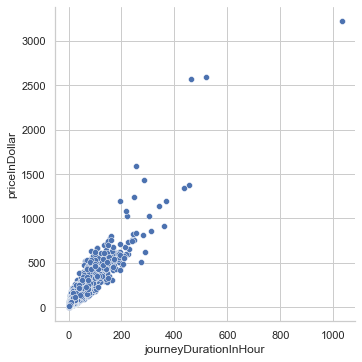

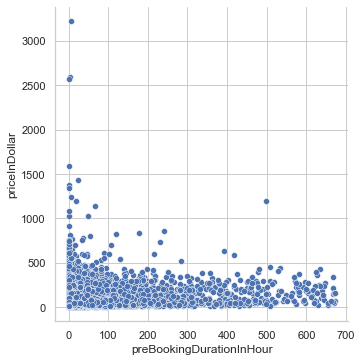

In [7]:
sns.relplot(x='journeyDurationInHour', y='priceInDollar', data=dfJourneys)
sns.relplot(x='preBookingDurationInHour', y='priceInDollar', data=dfJourneys)
# price is directly proportional to the duration of the journey (linear relationship)
# the price increases as the preBookingDurationInHour lowers

<AxesSubplot:ylabel='priceInDollar'>

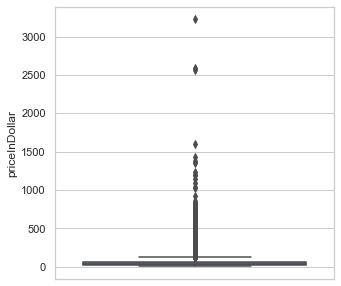

In [8]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneys["priceInDollar"])

In [9]:
import numpy as np  
import seaborn as sns

Q1 = np.percentile(dfJourneys['priceInDollar'], 25, interpolation = 'midpoint')
Q2 = np.percentile(dfJourneys['priceInDollar'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(dfJourneys['priceInDollar'], 75, interpolation = 'midpoint')
print(Q1, Q2, Q3)

IQR = Q3 - Q1
print('Interquartile range is', IQR)

lowerLimit = Q1 - 1.5 * IQR
print('Lower limit is', lowerLimit)

upperLimit = Q3 + 1.5 * IQR
print('Upper limit is', upperLimit)

outlier =[]
for x in dfJourneys['priceInDollar']:
    if ((x> upperLimit) or (x<lowerLimit)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)
len(outlier)

24.0 39.87 63.25
Interquartile range is 39.25
Lower limit is -34.875
Upper limit is 122.125
 outlier in the dataset is [517.5, 157.5, 126.25, 184.5, 133.17, 225.0, 232.5, 146.26, 234.0, 132.5, 270.0, 162.6, 238.5, 125.0, 136.12, 131.92, 130.68, 245.25, 159.37, 172.5, 150.0, 167.07, 140.0, 330.0, 168.0, 162.74, 160.0, 198.0, 154.0, 142.41, 272.5, 139.79, 335.61, 196.44, 450.0, 391.87, 322.5, 647.5, 450.0, 145.0, 137.5, 150.0, 175.0, 131.25, 140.0, 270.0, 165.75, 160.0, 150.0, 418.0, 147.0, 123.25, 255.0, 375.0, 137.5, 233.62, 336.16, 306.0, 139.06, 170.0, 150.0, 414.0, 465.0, 240.0, 231.83, 450.0, 130.0, 380.0, 170.0, 285.84, 176.0, 297.0, 325.0, 209.38, 342.13, 148.76, 334.37, 480.0, 128.0, 148.43, 180.0, 171.0, 144.88, 269.26, 215.0, 180.0, 137.5, 225.22, 135.0, 142.5, 166.5, 128.0, 178.75, 132.75, 360.0, 263.5, 124.0, 334.74, 220.0, 180.0, 180.0, 157.5, 225.0, 295.34, 133.0, 180.0, 135.0, 161.5, 292.12, 148.0, 142.5, 264.67, 408.0, 130.0, 190.0, 148.11, 195.0, 247.5, 242.5, 171.0, 17

3673

In [10]:
#dfJourneys[(dfJourneys['priceInDollar'] > upperLimit) | (dfJourneys['priceInDollar'] < lowerLimit)]

In [11]:
# dropping outliers records
dfJourneys.drop(dfJourneys[(dfJourneys['priceInDollar'] > upperLimit) | (dfJourneys['priceInDollar'] < lowerLimit)].index, inplace = True)

<AxesSubplot:ylabel='priceInDollar'>

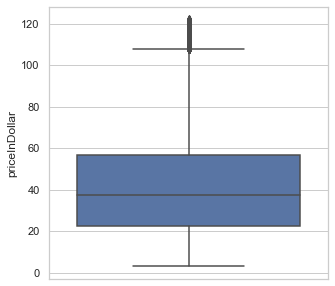

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneys["priceInDollar"])

<AxesSubplot:ylabel='journeyDurationInHour'>

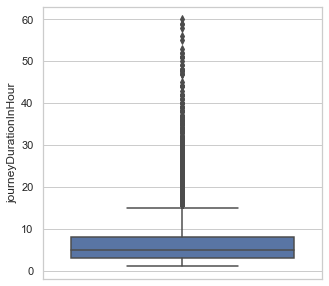

In [13]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneys["journeyDurationInHour"])
# 2.5 days of journey is logically acceptable

<AxesSubplot:ylabel='preBookingDurationInHour'>

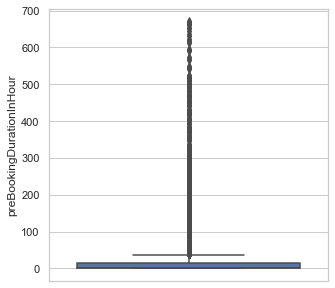

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(y=dfJourneys["preBookingDurationInHour"])
# 1 month prior book is logically acceptable

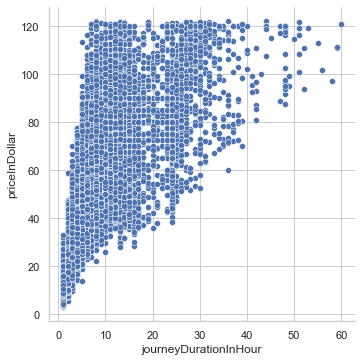

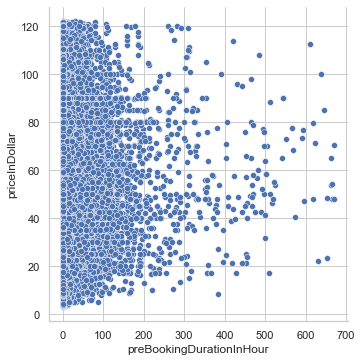

In [15]:
sns.relplot(x='journeyDurationInHour', y='priceInDollar', data=dfJourneys)
sns.relplot(x='preBookingDurationInHour', y='priceInDollar', data=dfJourneys)

<AxesSubplot:xlabel='priceInDollar', ylabel='city'>

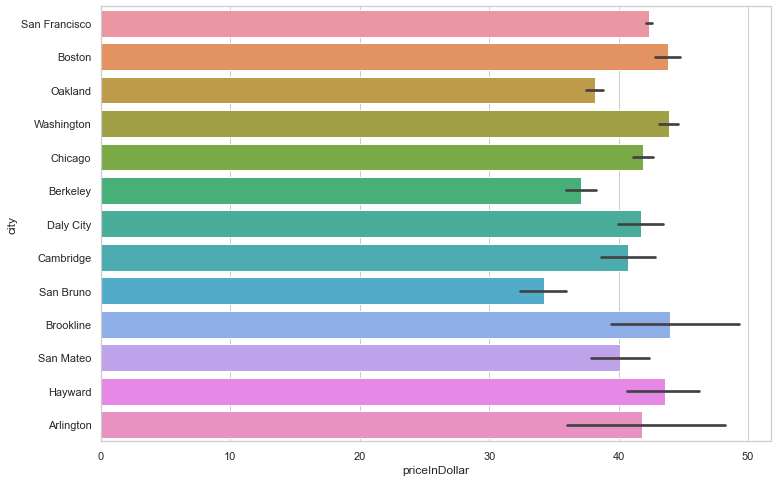

In [16]:
plt.figure(figsize=(12,8))
sns.barplot(x="priceInDollar", y="city", data=dfJourneys)

<AxesSubplot:xlabel='journeyStartMonth', ylabel='priceInDollar'>

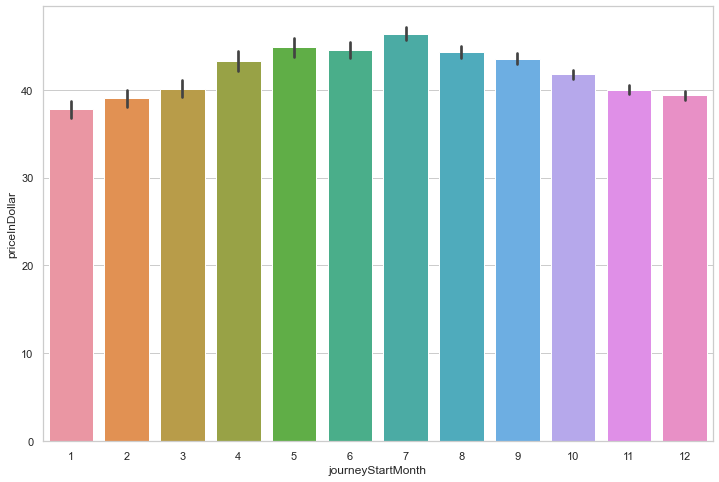

In [17]:
plt.figure(figsize=(12,8))
sns.barplot(x="journeyStartMonth", y="priceInDollar", data=dfJourneys)

<AxesSubplot:xlabel='journeyStartWeekday', ylabel='priceInDollar'>

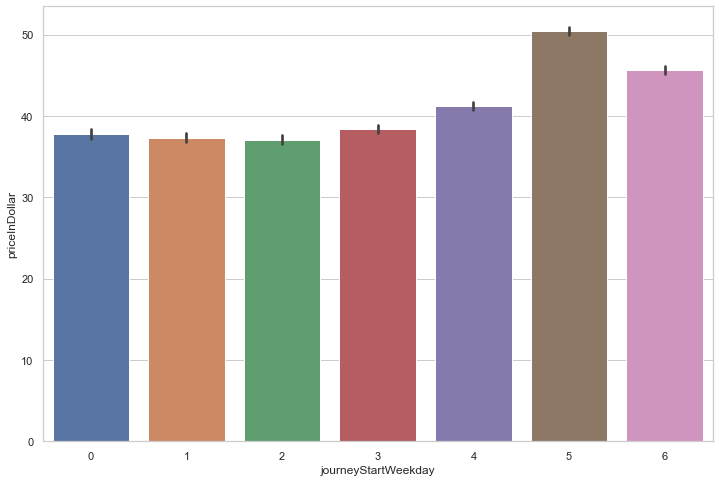

In [18]:
#Monday=0, Sunday=6
plt.figure(figsize=(12,8))
sns.barplot(x="journeyStartWeekday", y="priceInDollar", data=dfJourneys)

<AxesSubplot:xlabel='journeyStartHr', ylabel='priceInDollar'>

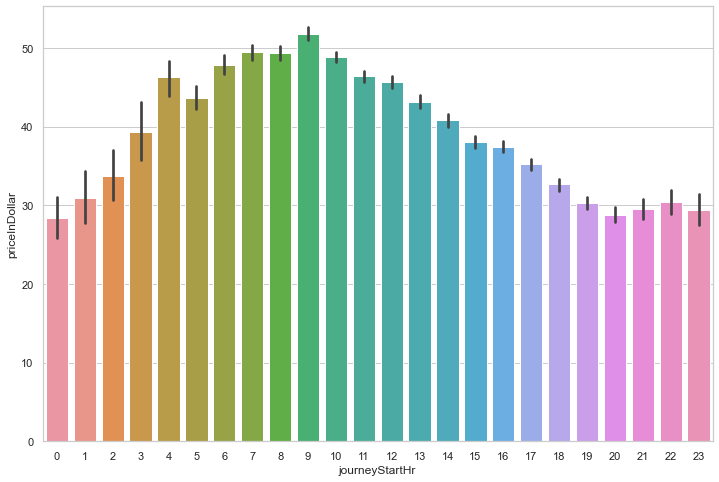

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x="journeyStartHr", y="priceInDollar", data=dfJourneys)

<AxesSubplot:xlabel='journeyStartHr', ylabel='count'>

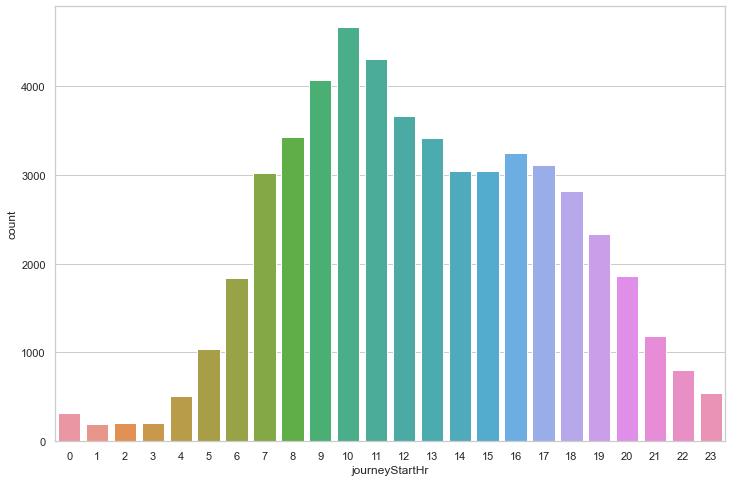

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x="journeyStartHr", data=dfJourneys)
# its clear that during early morning & late night, the car rent is extremely high
# 9 - 12 seems to be peak hours
# again 16 - 17 the car demand seems to be rising

In [21]:
# Bifurcate dataset into weekday & weekend
def fn_is_weekend(row):
    if ((row['journeyStartWeekday'] == 5) | (row['journeyStartWeekday'] == 6)):
        return 1
    else:
        return 0
    
dfJourneys['isWeekend'] = dfJourneys.apply(lambda x: fn_is_weekend(x), axis=1)

In [22]:
# Bifurcate dataset into yearly quarters

def fn_get_year_quarters(row):
    if ((row['journeyStartMonth'] >= 0) & (row['journeyStartMonth'] <= 2)):
        return 1
    elif ((row['journeyStartMonth'] >= 3) & (row['journeyStartMonth'] <= 5)):
        return 2
    elif ((row['journeyStartMonth'] >= 6) & (row['journeyStartMonth'] <= 8)):
        return 3
    else:
        return 4

dfJourneys['yearQuarter'] = dfJourneys.apply(lambda x: fn_get_year_quarters(x), axis=1)

In [23]:
# Bifurcate dataset w.r.t. daily hours
'''
1 : 21 - 5  : nightHours
2 : 6 - 7   : morningNonPeakHours
3 : 8 - 13  : morningPeakHours
4 : 14 - 17 : eveningPeakHours
5 : 18 - 20 : eveningNonPeakHours
'''
def fn_get_peak_hours(row):
    if ((row['journeyStartHr'] >= 21) | (row['journeyStartHr'] <= 5)):
        return 'nightHours'
    elif ((row['journeyStartHr'] == 6) | (row['journeyStartHr'] == 7)):
        return 'morningNonPeakHours'
    elif ((row['journeyStartHr'] >= 8) & (row['journeyStartHr'] <= 13)):
        return 'morningPeakHours'
    elif ((row['journeyStartHr'] >= 14) & (row['journeyStartHr'] <= 17)):
        return 'eveningPeakHours'
    else:
        return 'eveningNonPeakHours'

dfJourneys['peakHours'] = dfJourneys.apply(lambda x: fn_get_peak_hours(x), axis=1)    

In [24]:
dfJourneys.drop(dfJourneys.columns[[4,5,6]], axis = 1, inplace = True)
#dfJourneys

In [25]:
dfDummies1 = pd.get_dummies(dfJourneys['city'])
dfDummies1.columns = [str(col).replace(" ", "") for col in dfDummies1.columns]
dfJourneys = pd.concat([dfJourneys, dfDummies1], axis=1)
dfJourneys.drop('city', axis=1, inplace=True)

In [26]:
dfDummies2 = pd.get_dummies(dfJourneys['yearQuarter'])
dfDummies2.columns = ['yearQuarter' + str(col) for col in dfDummies2.columns]
dfJourneys = pd.concat([dfJourneys, dfDummies2], axis=1)
dfJourneys.drop('yearQuarter', axis=1, inplace=True)

In [27]:
dfDummies3 = pd.get_dummies(dfJourneys['peakHours'])
dfDummies3.columns = [str(col) for col in dfDummies3.columns]
dfJourneys = pd.concat([dfJourneys, dfDummies3], axis=1)
dfJourneys.drop('peakHours', axis=1, inplace=True)

In [30]:
dfJourneys

,journeyDurationInHour,preBookingDurationInHour,priceInDollar,isWeekend,Arlington,Berkeley,Boston,Brookline,Cambridge,Chicago,...,Washington,yearQuarter1,yearQuarter2,yearQuarter3,yearQuarter4,eveningNonPeakHours,eveningPeakHours,morningNonPeakHours,morningPeakHours,nightHours
0,4,1,20.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,11,12,55.00,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,2,1,18.00,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6,17,33.75,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4,2,34,21.25,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56532,6,29,43.89,1,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
56533,10,88,55.19,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
56534,4,278,26.12,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
56535,1,0,10.62,1,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [35]:
#dfJourneys.iloc[:, dfJourneys.columns != 'priceInDollar']
print(type(dfJourneys.iloc[:, dfJourneys.columns == 'priceInDollar']))
print(type(dfJourneys.iloc[:, 2]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [438]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dfJourneys.iloc[:, dfJourneys.columns != 'priceInDollar'], dfJourneys.iloc[:, 2], test_size = 0.20, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(42291, 25) (10573, 25) (42291, 1) (10573, 1)


In [439]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV 

**Linear Regression**

In [440]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [441]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))

#calculate R^2 for train data
r2_score(y_train, pred_train_LR)

Root Mean Squared Error For Training data = 13.491046256106332


0.7058895082488982

In [442]:
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

##calculating RMSE for train data
RMSE_test_LR= np.sqrt(mean_squared_error(y_test, pred_test_LR))

print("Root Mean Squared Error For test data = "+str(RMSE_test_LR))

#calculate R^2 for test data
r2_score(y_test, pred_test_LR)

Root Mean Squared Error For test data = 13.328643821417474


0.7090322794151538

**Decision Tree**

In [443]:
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

In [444]:
#prediction on train data
pred_train_DT = fit_DT.predict(X_train)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))

## R^2 calculation for train data
r2_score(y_train, pred_train_DT)

Root Mean Squared Error For Training data = 13.412119057893968


0.7093207342262928

In [445]:
#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

## R^2 calculation for test data
r2_score(y_test, pred_test_DT)

Root Mean Squared Error For Test data = 13.432663610800587


0.7044730002592667

**Random Forest**

In [446]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

<ipython-input-446-e3b9271a0c33>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)


In [447]:
#prediction on train data
pred_train_RF = fit_RF.predict(X_train)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_RF))

## calculate R^2 for train data
r2_score(y_train, pred_train_RF)

Root Mean Squared Error For Training data = 7.297590730921693


0.9139445735356163

In [448]:
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_RF))

#calculate R^2 for test data
r2_score(y_test, pred_test_RF)

Root Mean Squared Error For Test data = 10.240589460647493


0.8282396966386093

**Gradient Boosting**

In [449]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [450]:
#prediction on train data
pred_train_GB = fit_GB.predict(X_train)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_GB))

#calculate R^2 for test data
r2_score(y_train, pred_train_GB)

Root Mean Squared Error For Training data = 9.804120790238818


0.8446767171037305

In [451]:
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print("Root Mean Squared Error For Test data = "+str(RMSE_test_GB))

#calculate R^2 for test data
r2_score(y_test, pred_test_GB)

Root Mean Squared Error For Test data = 9.858786795657188


0.8408085141982686

**Cross validation: Random Search CV on gradient boosting model**

In [452]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [453]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_
best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.81.
RMSE =  10.779666941251346


**Random Search CV on Random Forest Model**

In [454]:
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_RRF = randomcv_rf.predict(X_test)

view_best_params_RRF = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_RRF = best_model.predict(X_test)

#R^2
RRF_r2 = r2_score(y_test, predictions_RRF)
#Calculating RMSE
RRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_RRF))

print('Random Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_RRF)
print('R-squared = {:0.2}.'.format(RRF_r2))
print('RMSE = ',RRF_rmse)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

Random Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.84.
RMSE =  9.804333438074961


**Predicting using Random Search CV for decision tree Model**

In [1]:
y_train.columns

NameError: name 'y_train' is not defined

In [37]:
import pendulum
#pprint(pendulum.timezones)

def fn_is_weekend(journeyStartWeekday):
    if ((journeyStartWeekday == 5) | (journeyStartWeekday == 6)):
        return 1
    else:
        return 0

def fn_get_year_quarters(journeyStartMonth):
    if ((journeyStartMonth >= 0) & (journeyStartMonth <= 2)):
        return 1
    elif ((journeyStartMonth >= 3) & (journeyStartMonth <= 5)):
        return 2
    elif ((journeyStartMonth >= 6) & (journeyStartMonth <= 8)):
        return 3
    else:
        return 4

def fn_get_peak_hours(journeyStartHr):
    if ((journeyStartHr >= 21) & (journeyStartHr <= 5)):
        return 'nightHours'
    elif ((journeyStartHr == 6) | (journeyStartHr == 7)):
        return 'morningNonPeakHours'
    elif ((journeyStartHr >= 8) & (journeyStartHr <= 13)):
        return 'morningPeakHours'
    elif ((journeyStartHr >= 14) & (journeyStartHr <= 17)):
        return 'eveningPeakHours'
    else:
        return 'eveningNonPeakHours'
    
timeZones = {'San Francisco':'PST8PDT', 'Boston':'EST5EDT', 'Oakland':'PST8PDT', 'Washington':'PST8PDT', 'Chicago':'CST6CDT',
       'Berkeley':'PST8PDT', 'Daly City':'PST8PDT', 'Cambridge':'Etc/GMT+1', 'San Bruno':'PST8PDT', 'Brookline':'EST5EDT',
       'San Mateo':'PST8PDT', 'Hayward':'PST8PDT', 'Arlington':'CST6CDT'}

df = pd.DataFrame(columns=['journeyDurationInHour', 'preBookingDurationInHour', 'isWeekend', \
       'Arlington', 'Berkeley', 'Boston', 'Brookline', 'Cambridge', 'Chicago', \
       'DalyCity', 'Hayward', 'Oakland', 'SanBruno', 'SanFrancisco', \
       'SanMateo', 'Washington', 'yearQuarter1', 'yearQuarter2', \
       'yearQuarter3', 'yearQuarter4', 'nightHours', 'eveningNonPeakHours', 'eveningPeakHours', \
       'morningNonPeakHours', 'morningPeakHours'])

inputCity ='San Francisco'
inputJourneyStartDate = '2021-06-12'
inputJourneyStartTime = '12:18:00'
inputjourneyDurationInHour = '12'
localTimeZone = timeZones.get(inputCity)
journeyCreationTime = pd.to_datetime(pendulum.now(localTimeZone).format('YYYY-MM-DD HH:mm:ss'))
inputJourneyStartTime = pd.to_datetime(inputJourneyStartDate + ' ' + inputJourneyStartTime, format="%Y/%m/%d %H:%M:%S")
preBookingDurationInHour = int((inputJourneyStartTime - journeyCreationTime) / pd.Timedelta(hours=1))
df['journeyDurationInHour'] = [inputjourneyDurationInHour]
df['preBookingDurationInHour'] = [preBookingDurationInHour]
df[inputCity.replace(" ", "")] = 1
df['isWeekend'] = fn_is_weekend(inputJourneyStartTime.dayofweek)
yearQuarterVar = fn_get_year_quarters(inputJourneyStartTime.month)
df['yearQuarter' + str(yearQuarterVar)] = 1
peakHoursVar = fn_get_peak_hours(inputJourneyStartTime.hour)
df[peakHoursVar] = 1

df = df.fillna(0)

df


,journeyDurationInHour,preBookingDurationInHour,isWeekend,Arlington,Berkeley,Boston,Brookline,Cambridge,Chicago,DalyCity,...,Washington,yearQuarter1,yearQuarter2,yearQuarter3,yearQuarter4,nightHours,eveningNonPeakHours,eveningPeakHours,morningNonPeakHours,morningPeakHours
0,12,61,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [458]:
test = df

In [460]:
RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RRF, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)

view_best_params_RRF = randomcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = randomcv_rf.predict(test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y wa

In [465]:
predictions_GRF_test_Df[0]

72.17299339078382